## Aufgabe 1 Aufgabenteil 2
### 2.1

As we are using only the training data split the numbers may vary if the split is regenerated. This happens because the rows are split randomly into test, training and validation.

In [29]:
import pandas as pd

data = pd.read_pickle('./files/train.pickle')

imdb_score_mean = data['imdb_score'].mean()
imdb_score_std = data['imdb_score'].std()
imdb_votes_mean = data['imdb_votes'].mean()
imdb_votes_std = data['imdb_votes'].std()

print(f'imdb score:\n  mean: {round(imdb_score_mean, 2)}\n  standard deviation: {round(imdb_score_std, 2)}')
print(f'imdb votes:\n  mean: {round(imdb_votes_mean, 2)}\n  standard deviation: {round(imdb_votes_std, 2)}')

imdb score:
  mean: 6.52
  standard deviation: 1.17
imdb votes:
  mean: 22735.44
  standard deviation: 86725.88


### 2.2

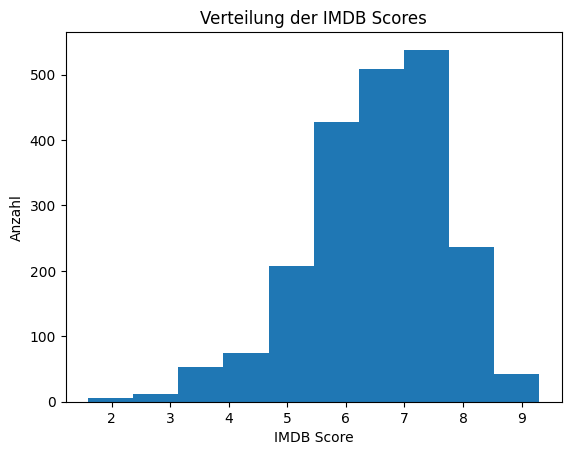

count    2.105000e+03
mean     2.273544e+04
std      8.672588e+04
min      5.000000e+00
25%      5.140000e+02
50%      2.303000e+03
75%      9.608000e+03
max      2.268288e+06
Name: imdb_votes, dtype: float64


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlim'

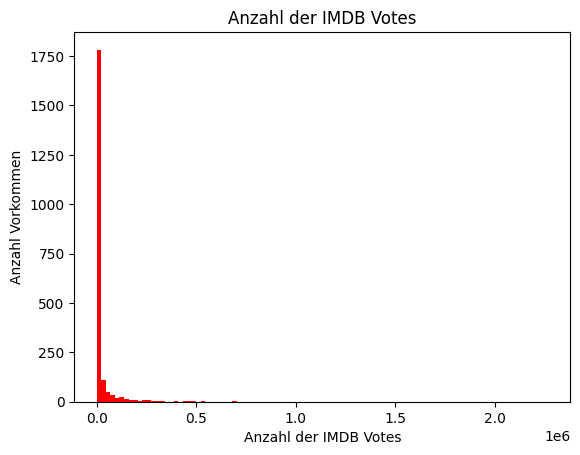

In [46]:
import pandas as pd
import matplotlib.pyplot as plot

data = pd.read_pickle('./files/train.pickle')

plot.hist(data['imdb_score'], bins=10)
plot.title('Verteilung der IMDB Scores')
plot.xlabel('IMDB Score')
plot.ylabel('Anzahl')
plot.show()

print(data['imdb_votes'].describe())

plot.hist(data['imdb_votes'], bins=100,histtype='stepfilled', color='red')
xa = plot.gca()
xa.set_xlim(5.140000e02, 9.608000e03)
plot.title('Anzahl der IMDB Votes')
plot.xlabel('Anzahl der IMDB Votes')
plot.ylabel('Anzahl Vorkommen')

plot.show()

### 2.3

### 2.4

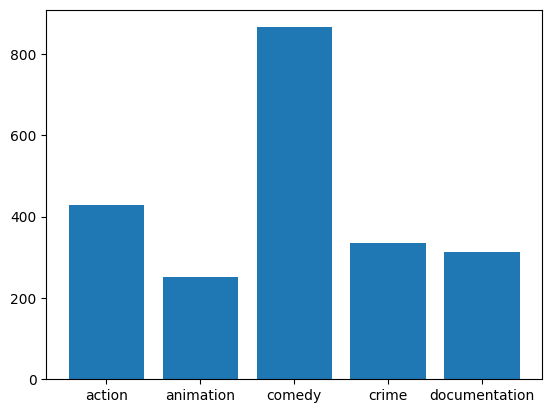

In [31]:
import matplotlib.pyplot as plot
import pandas as pd

data = pd.read_pickle('./files/train.pickle')

names = ['action', 'animation', 'comedy', 'crime', 'documentation']
values = []
for c in names:
    values.append(data[c].sum())

fix, ax = plot.subplots()

ax.bar(names, values)

plot.show()

### 2.5